In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from keras.utils import to_categorical, plot_model
from keras.datasets import mnist

In [2]:
# Load data

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
 x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

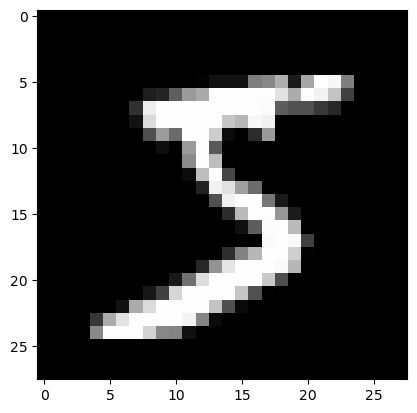

In [4]:
plt.imshow(x_train[0], cmap='gray')

### Sacle the data:  Divide by 255

In [5]:
x_train= x_train/255
x_test= x_test/255

### Build the model

In [6]:
model = Sequential()

# First Convolution Layer
model.add(Conv2D(filters=32, input_shape=(28,28,1), kernel_size=(3,3), activation='relu'))

#First Pooling layer
model.add(MaxPool2D(pool_size=(2,2)))


# Second Convolution Layer
model.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu'))

#Second Pooling layer
model.add(MaxPool2D(pool_size=(2,2)))

#Flatten Layer
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))


In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 16)        4624      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 16)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 256)               1

In [8]:
'''## Install Pydot for this
plot_model(model,  show_layer_activations=True, show_layer_names=True, 
          show_shapes=True)'''

'## Install Pydot for this\nplot_model(model,  show_layer_activations=True, show_layer_names=True, \n          show_shapes=True)'

In [9]:
# Compile Model
# loss = sparse_cate -> as target data is not going to change in categorical 

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [10]:
# Train model
model.fit(x_train, y_train, epochs=10, batch_size=10)

Epoch 1/10


6000/6000 [==============================] - 30s 5ms/step - loss: 0.1217 - accuracy: 0.9621
Epoch 2/10
6000/6000 [==============================] - 29s 5ms/step - loss: 0.0492 - accuracy: 0.9856
Epoch 3/10
6000/6000 [==============================] - 30s 5ms/step - loss: 0.0350 - accuracy: 0.9896
Epoch 4/10
6000/6000 [==============================] - 30s 5ms/step - loss: 0.0271 - accuracy: 0.9920
Epoch 5/10
6000/6000 [==============================] - 30s 5ms/step - loss: 0.0233 - accuracy: 0.9930
Epoch 6/10
6000/6000 [==============================] - 30s 5ms/step - loss: 0.0192 - accuracy: 0.9940
Epoch 7/10
6000/6000 [==============================] - 29s 5ms/step - loss: 0.0174 - accuracy: 0.9946
Epoch 8/10
6000/6000 [==============================] - 29s 5ms/step - loss: 0.0143 - accuracy: 0.9959
Epoch 9/10
6000/6000 [==============================] - 30s 5ms/step - loss: 0.0150 - accuracy: 0.9955
Epoch 10/10
6000/6000 [==============================] - 30s 5ms/step -

In [11]:
model.evaluate(x_test, y_test, batch_size=1)

10000/10000 [==============================] - 36s 4ms/step - loss: 0.0442 - accuracy: 0.9916


[0.0442052036523819, 0.991599977016449]

### Predict on new image

In [18]:
import cv2

In [19]:
# Read image in gray scale
image=cv2.imread("images/digit_3.png",0)


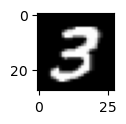

In [20]:
# Resize to 28x28 size
image = cv2.resize(image, (28,28))

plt.figure(figsize=(1,1))
plt.imshow(image, cmap='gray')

In [21]:
# Rescale and Reshape the image
image = image/255
image = image.reshape(1,28,28)

# Predict the image
result1 = model.predict(image)
np.argmax(result1)

1/1 [==============================] - 0s 32ms/step


3